# Portfolio Analysis


In [21]:
from analyze import analyze
import matplotlib.pyplot as plt

config = {
    'initial_capital': 10000.0,
    'start_date': '2025-01-31',
    'end_date': '',
    'portfolios': [
        {
            'name': 'Alex',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'quarterly',
                    'BLNDX': 0.5,
                    'CAOS': 0.2,
                    'QMHIX': 0.2,
                    'MFTNX': 0.1,
                },
            },
        },
        {
            'name': 'Chris',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'quarterly',
                    'IWF': 0.5,
                    'EFA': 0.2,
                    'CSEIX': 0.2,
                    'BRK-B': 0.05,
                    'IBIT': 0.05,
                },
            },
        },
        {
            'name': 'Clay',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'quarterly',
                    'BLNDX': 0.4,
                    'QDSIX': 0.2,
                    'SDRAX': 0.2,
                    'CAOS': 0.2,
                },
            },
        },
        {
            'name': 'Ian',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'none',
                    'HTUS': 1,
                },
            },
        },
        {
            'name': 'Joe',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'quarterly',
                    'CEG': 0.1,
                    'RXRX': 0.1,
                    'VST': 0.1,
                    'GEO': 0.1,
                    'MP': 0.1,
                    'TEM': 0.1,
                    'QRTEA': 0.1,
                    'NLY': 0.1,
                    'NDOI': 0.1,
                    'NEO': 0.1,
                },
            },
        },
        {
            'name': 'Jose',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'none',
                    'VMFXX': 1,
                },
                '2025-02-04': {
                    'auto_rebalance': 'quarterly',
                    'BLNDX': 0.4,
                    'QLEIX': 0.4,
                    'TYA': 0.15,
                    'VIXY': 0.05,
                },
            },
        },
        {
            'name': 'Jason',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'none',
                    'BIL': 1,
                },
                '2025-02-11': {
                    'auto_rebalance': 'monthly',
                    'ETHA': 0.8,
                    'CAOS': 0.1,
                    'SPY': 0.1,
                },
            },
        },
        {
            'name': 'Justin',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'none',
                    'BIL': 1,
                },
                '2025-02-11': {
                    'auto_rebalance': 'monthly',
                    'GLD': 0.4,
                    'TQQQ': 0.3,
                    'IBIT': 0.3,
                },
            },
        },
        {
            'name': 'Michael',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'none',
                    'NVDA': 1,
                },
            },
        },
        {
            'name': 'Randy',
            'settings_history': {
                '2025-01-31': {
                    'auto_rebalance': 'none',
                    'BTOP': 1,
                },
            },
        },
    ],
}


results = analyze(config)

In [22]:
print(f'Last date: {results["values_df"].index.max()}')
print(f'First date: {results["values_df"].index.min()}')
print(
    results['stats_df'].to_string(
        index=False,
        formatters={
            'total_return': '{:.2%}'.format,
            'maxdd': '{:.2%}'.format,
            'sharpe': '{:.2f}'.format,
            'score': '{:.0f}'.format,
        },
    )
)
print(f'\nWinners: {", ".join(results["winners"])}')

Last date: 2025-02-28 00:00:00
First date: 2025-01-31 00:00:00
portfolio total_return   maxdd sharpe  rebalances score
  Michael        4.03% -14.20%   1.23           1     1
     Jose       -0.11%  -1.66%  -0.30           2     1
     Alex       -1.73%  -2.90%  -3.10           1     0
    Chris       -1.34%  -3.56%  -1.72           1     0
     Clay       -1.19%  -2.28%  -2.92           1     0
      Ian       -1.35%  -3.77%  -1.57           1     0
      Joe       -3.73% -11.09%  -1.63           1     0
    Randy       -9.04%  -9.23%  -3.55           1     0
    Jason      -11.50% -15.73%  -4.29           3     0
   Justin       -4.19%  -6.68%  -4.09           3     0

Winners: Michael, Jose


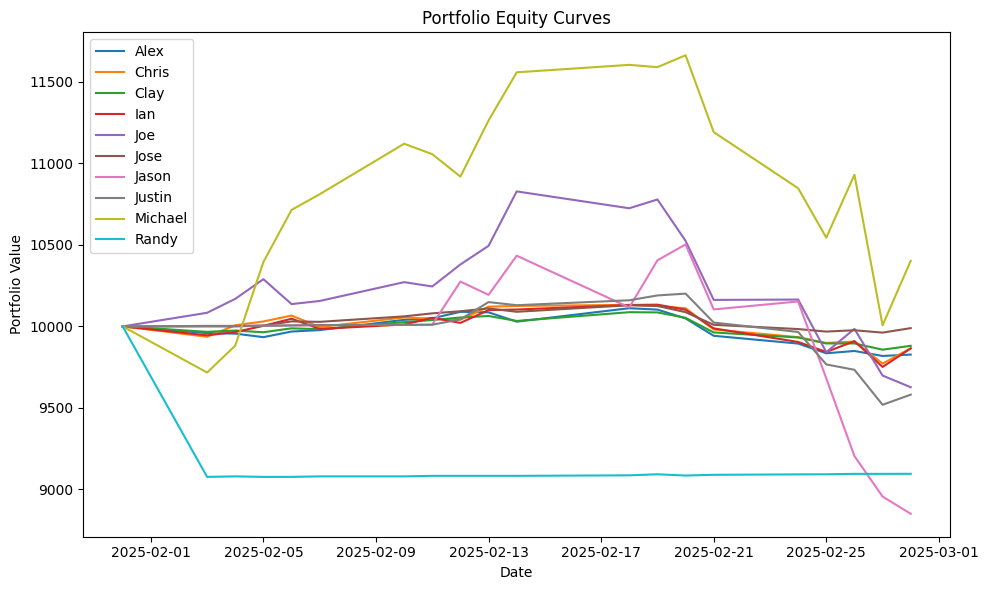

In [23]:
# Plot the backtested daily equity curves for all portfolios
plt.figure(figsize=(10, 6))
for name in results['values_df'].columns:
    plt.plot(results['values_df'].index, results['values_df'][name], label=name)
plt.title('Portfolio Equity Curves')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.tight_layout()
plt.show()

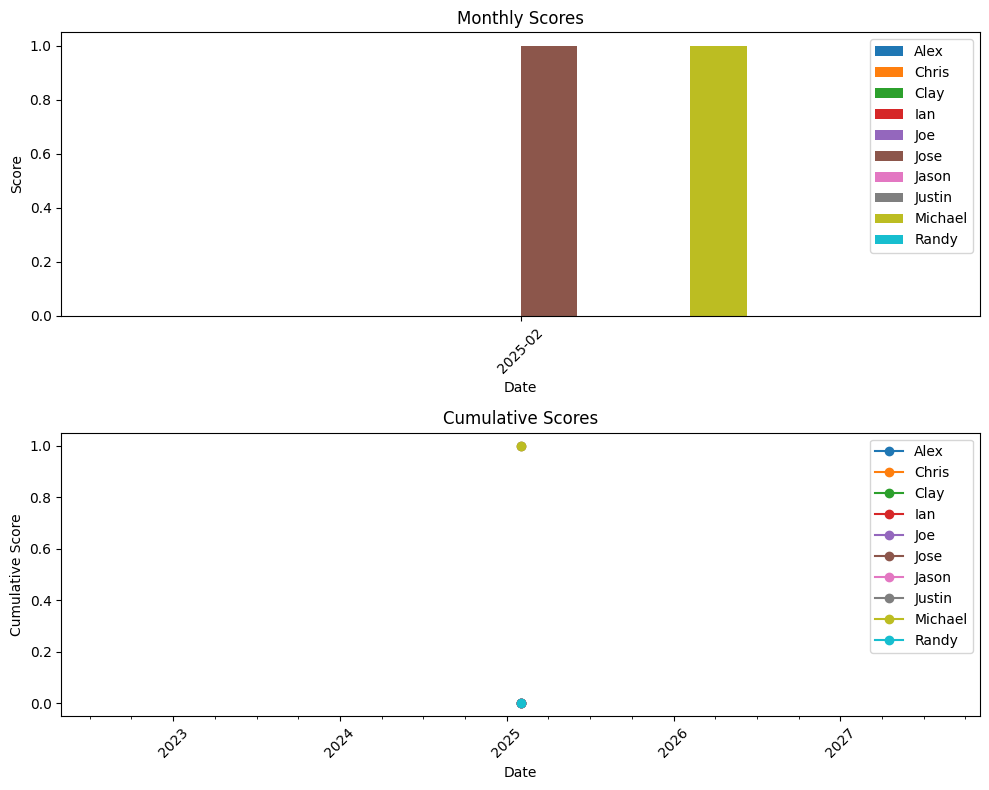

In [24]:
# Plot the monthly scores and cumulative scores

# Supress pyplot warnings
import warnings

warnings.filterwarnings('ignore')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Monthly scores bar chart
results['monthly_scores_df'].plot(kind='bar', width=0.8, ax=ax1)
ax1.set_title('Monthly Scores')
ax1.set_xlabel('Date')
ax1.set_ylabel('Score')
ax1.tick_params(axis='x', rotation=45)

# Cumulative scores line chart
cumulative_scores = results['monthly_scores_df'].cumsum()
cumulative_scores.plot(ax=ax2, marker='o')
ax2.set_title('Cumulative Scores')
ax2.set_xlabel('Date')
ax2.set_ylabel('Cumulative Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()